<h1>Linear Algebra (CpE210A)</h1>

<h2>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib</h2>


<p>Coded and submitted by:<br>Sustento, Myke Alvin E.<br>58010</p>

<h5>Lab Exercises: </h5>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

<h1>Part 1: Skyline Eagle Fly</h1>

<p>You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative <b>displacement</b> of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:
</p>

<p>Consider the computational algorithm:

Let the eagle's longitudinal and latitudinal be $long$ and $lat$  respectively.
<br>Let the eagle's total distance as  $dist$<sub>total</sub> , displacement be  $disp$ , and  $θ$  as the direction of the vector.</p>

<sub>$(Eq.1)$</sub> $dist$<sub>$total$</sub> $= (long$<sub>$total$</sub>)$\hat{x}$ + $(lat$<sub>$total$</sub>)$\hat{y}$
<br>
<sub>$(Eq.2)$</sub> $disp$ = $\sqrt{distx^2 + disty^2} $
<br>
<sub>$(Eq.3)$</sub> $θ$ = $ arctan(\frac{y}{αx}) $    
    


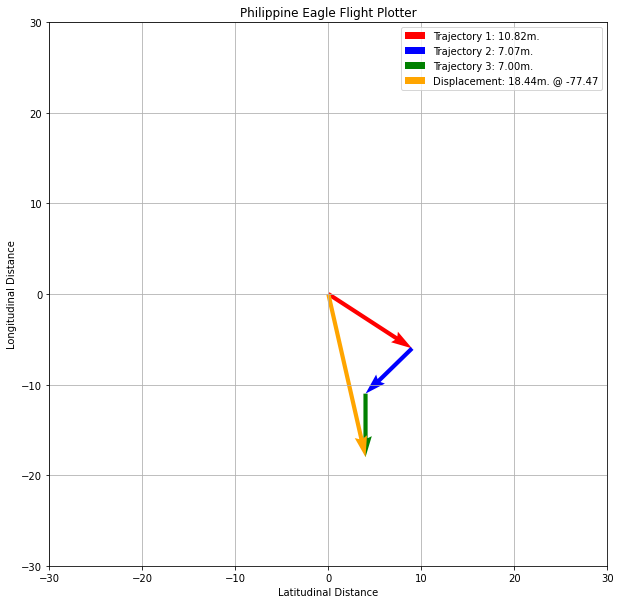

In [26]:
%matplotlib inline
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3) ## since we don't actually have eagle tracking data we will use
    lat =  np.random.randint(-10,10, size=3) ## random integers for this activity. These two lines will produce
                                             ## a vector with shape of (3,) describing the distances for the 
                                             ## eagle's flight.

    dist1 = np.array([long[0],lat[0]])                        ## setups the array for each vector for the eagle's flight.
    dist2 = np.array([long[1],lat[1]])  
    dist3 = np.array([long[2],lat[2]])  
    
    dist_total = dist1 + dist2 + dist3                              ## formula for the resultant vector for the eagle's flight.
    disp  = np.linalg.norm(dist_total)                              ## formula for the magnitude of the displacement
    alpha = 10**-6
    theta = np.arctan((dist_total[1])/(dist_total[0] + alpha))     ## computes for the angle of the displacement. 
    theta = np.degrees(theta)                                      ## converts theta from rad to deg.
   
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10)) 
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30) 
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2

    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    # parameters of quiver([X, Y], U, V, [C], **kw)
        # [X, Y] defines the arrow location
        # U, V defines the arrow direction
        # C sets the color
        # units - To plot vectors in the x-y plane, with u and v having the same units as x and y, 
            ## use ``angles='xy', scale_units='xy', scale=1``.
 
    
    #red arrow (trajectory 1)
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    #blue arrow (trajectory 2)
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    #green arrow (trajectory 3)
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    #orange arrow (total displacement)
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()    #plt.legend() place the legend on the axes

    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()   #plt.show() displays all figures
    
## END OF FUNCTION  

track_eagle(make_figs=False) ## Let 'make_figs' equal to False during debugging.



<h3> Guide Questions:</h3>

<p>1. What is the use of the variable $α$ 
<div style="text-align: justify">The alpha was added in the formula to prevent division by zero which can cause an error.</div></p>

<p>2. Kindly explain the process of plotting the eagle flight vectors.
<div style="text-align: justify">Plt.quiver() function, as the name suggests, is the arrow that plots the vectors. There are 4 plt.quiver() function given in graded cell 1 which are trajectory 1 (red arrow), trajectory 2 (blue arrow), trajectory 3 (green arrow), and total displacement (orange arrow) in that order. Based on the documentation given by jupyter notebook, the parameters that was used in graded cell 1 was quiver([X, Y], U, V, [C], and the units). X,Y serves to define the starting point of the arrow location. The x,y in trajectory 1, 2, 3, and total displacement is [0,0],[dist1[0], dist1[1]], [(np.add(dist1[0],dist2[0]),np.add(dist1[1],dist2[1])], and [0,0] in that order. The reasoning for these x,y values can be seen on the graph which can be clearly seen that the trajectory 1, 2, and 3 are interconnected with 0,0 as the origin. These values will manifest 3 interconnected vectors that will result in a total displacement from the origin to the end of trajectory 3. U,V is defined as the location of the arrow. U,V will serve as the direction in which the trajectory 1, 2, 3  and the total displacement will point towards. The u,v in trajectory 1, 2, 3 and total displacement are [dist1[0], dist1[1]], [dist2[0], dist2[1]], [dist3[0], dist3[1]], and [dist_total[0], dist_total[1]] in that order. The u,v values are created by the randomly generated values in long and lat variables. C or ,in this case, color is self explanatory. It sets the color of the trajectories for easier analyzation. According to the documentation given by jupyter, to plot vectors in the x-y plane, with u and v having the same units as x and y, use ``angles='xy', scale_units='xy', scale=1``. plt.legend() serves to place the legends on the axis given by the label. Lastly, plt.show() displays all the figures.</div></p>

<p>3. Provide a flow chart describing the 'track_eagle' function.</p>
    <img src="LA_LAB_2_CELL_1_EAGLE_FLIGHT_FLOWCHART.jpeg">

<h1>Part 2: Reverse Engineering</h1>
<p>Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below.</p>

<p>The eagle_kinematics function aims to get the position_total, velocity_total, and the acceleration_total. </p>
$s$<sub>$t$</sub> = sum of $\begin{bmatrix} position[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[:] \end{bmatrix} $ 
<br>
$v$<sub>$t$</sub> = sum of $\begin{bmatrix} velocity[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[1:] \end{bmatrix} $ 
<br>
$a$<sub>$t$</sub> = sum of $\begin{bmatrix} acceleration[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[2:] \end{bmatrix} $ 
</div></p>


In [28]:
def eagle_kinematics(position, time):
    req_shape = 4
    velocity = np.zeros((req_shape-1,)) # array of zeroes [0,0,0]
    acceleration = np.zeros((req_shape-2,)) # array of zeroes [0,0]
    total_vector = np.array([t**3, t**2, t, 1]) # array [8,4,2,1]
    if position.shape == (req_shape,): 
        velocity = np.array([3*position[0],2*position[1], position[2]]) # array [6,2,3]  
        acceleration = np.array([2*velocity[0],velocity[1]]) # array [12,2]
        position_total = np.sum(np.multiply(position, total_vector)) #  np.multiply([8,4,2,1],[2,1,3,2]) = np.sum[16,4,6,2] = 28
        velocity_total = np.sum(np.multiply(velocity, total_vector[1:])) #  np.multiply([4,2,1],[6,2,3]) = np.sum[24,4,3] = 31
        acceleration_total = np.sum(np.multiply(acceleration, total_vector[2:])) #  np.multiply([2,1],[12,2]) = np.sum[24,2] = 26
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return position_total, velocity_total, acceleration_total


In [29]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

<h3> Guide Questions: </h3>
<p>1. What is the function for? Explain the inputs, process, functions used, and the outputs.
<div style="text-align: justify"> The eagle_kinematics function aims to get the position_total, velocity_total, and the acceleration_total. The inputs are x and t which are positions and time. The process to get position_total is np.multiply([8,4,2,1],[2,1,3,2]) = np.sum[16,4,6,2] = 28, to get velocity_total is np.multiply([4,2,1],[6,2,3]) = np.sum[24,4,3] = 31, while acceleration_total is np.multiply([2,1],[12,2]) = np.sum[24,2] = 26. The functions used are np.zeros(), np.array(), np.sum(), and np.multiply(). np.zeros() is used to return an array filled with zeroes, np.array() is used to create an array, np.sum() is used to get the sum of array elements over a given axis, and np.multiply() is used to multiply arguments element-wise. The outputs are position_total, velocity_total, and acceleration_total </div></p>

<p>2. Kindly provide equations for  $s$<sub>$t$</sub> , $v$<sub>$t$</sub> , and  $a$<sub>$t$</sub>  basing on their code.
<div style="text-align: justify"> 
$s$<sub>$t$</sub> = sum of $\begin{bmatrix} position[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[:] \end{bmatrix} $ 
<br>
$v$<sub>$t$</sub> = sum of $\begin{bmatrix} velocity[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[1:] \end{bmatrix} $ 
<br>
$a$<sub>$t$</sub> = sum of $\begin{bmatrix} acceleration[:] \end{bmatrix} $ x $\begin{bmatrix} totalvector[2:] \end{bmatrix} $ 
</div></p>




<h1>Part 3: Bebang's Online Business</h1>
<p>You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.
</p>

In [30]:
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (4,)) and (reach.shape == (4,)): #checks if the number of profit and shape are 4 (4 because there are 4 weeks in a month) 
        week1 = np.array((reach[0], profit[0])) #creates an array for the weekly with reach and profit as the elements      
        week2 = np.array((reach[1], profit[1]))  
        week3 = np.array((reach[2], profit[2]))  
        week4 = np.array((reach[3], profit[3]))  
        
        week_total = week1 + week2 + week3 + week4          #computes the resultant
        week_performance = np.linalg.norm(week_total)       #computes the magnitude
        alpha = 10**-6
        reach_gradient = np.arctan((week_total[1])/(week_total[0] + alpha))    ## computes for the angle of the displacement.     
        reach_gradient = np.degrees(reach_gradient)                            ## converts theta from rad to deg. 
        

                                       
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()

        #Week 1
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        #Week 2
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='green', width=0.0025, 
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        #Week 3
        plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025, 
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        #Week 4
        plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025, 
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
             
        
        #Efficiency
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.005, 
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Wait for the month to finish to calculation of the Monthly Post Efficiency')

## END OF FUNCTION  



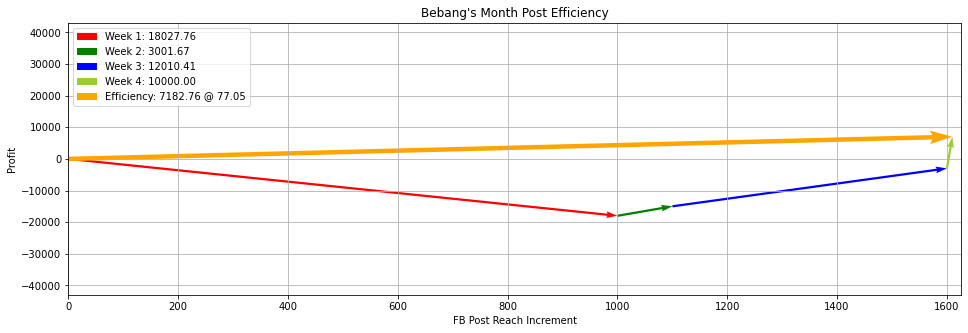

In [31]:
profit= np.array([-18000, 3000, 12000, 10000])        #Profit of Bebang's Online Business
## Original Values [-18000, 3000, 12000, 10000]
reach = np.array([1000, 100, 500, 10])           #Reach of Bebang's FB Posts
## Original Values [1000, 100, 500, 10]

month_profit_trace(profit, reach, make_figs=False) ## Toggle 'make_figs' during debugging or making documentations

<h3> Guide Questions:</h3>
<p>1. What is the relationship between the FB post reach and the profit?
<div style="text-align: justify">The relationship between the FB post reach and the profit is directly proportionate to the efficiency. This would mean that if her fb post reach more people or her profit goes up, the efficiency of her post goes up as well and vice versa. </div></p>

<p>2. Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?
<div style="text-align: justify">The answer is simply because it is more efficient and proficient. For example, in profit we can have a negative value since there is a thing called a net loss while in the fb post we can only have a positive value since it is physically impossible to have negative reach. If we were to switch the axis and put profit in the x-axis while fb post is in the y-axis, it would make the graph harder to read since the graph would go vertically left and right. Some parts of the code will also need to be changed such as the plt.xlim, plt.ylim, plt.xlabel, plt.ylabel, etc. since they are related to the values of x and y axis</div></p>

<p>3. Kindly explain the process of plotting the post efficiency vectors?
<div style="text-align: justify">Since the formulas and codes used in graded cell 1 and 3 are similar, the process in how they plot is similar. The parameters used in graded cell 3 are quiver([X, Y], U, V, [C], and the units). The x,y represents the reach and profit in that order.The u,v defines as the week passed. The C still represents the color and the units used are angles, scale_units, scale, and width. Graded cell 1 and 3 have different representations of values but the process is the same.
</div></p>

<p>4. Provide a necessary equations that are representative to finding the  $performance$<sub>$week$</sub>  and  $reach$<sub>$gradient$</sub> .
<div style="text-align: justify">
$performance$<sub>$week$</sub> $= \sqrt{week total[0]^2 + week total[1]^2}$
<br><br>$reach$<sub>$gradient$</sub> $= arctan(week total[1]/week total[0] + alpha)$
</div></p>

<p>5. Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.
<div style="text-align: justify"><b>Based from the original scenario</b><br><b>Scenario 1:</b> higher profit = higher efficiency<br><b>Scenario 2:</b> decrease in reach = decrease in efficiency
    <br><b>Scenario 3:</b> decrease in profit = decrease in efficiency
</div></p>

<p>6. What can be observed and concluded with the behavior of the vectors with respect to post efficiency?
<div style="text-align: justify">Based on the graphs, It can be observed that everytime the profit or the reach increases/decrease, the efficiency also increases/decreases. Therefore, it can be concluded that the behaviors of the vectors are directly proportional with respect to post efficiency    </div></p>


